In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append("..")
import source.explore as exp

pd.set_option('max_columns', 200)

From a previous run, we have the out of folds predictions over our training set. We put it together with the original set.

In [2]:
df = pd.read_csv('../oof_pred/for_error_analysis.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target
0,1233,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1224,0,0,1224,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2,462,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,11.555853,11.573088,11.655304,11.600304,11.574272,11.530775
1,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.846610,11.844509,11.805784,11.860367,11.855860,11.864469
2,243,50,RM,63.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,4,1900,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,540,540,GasA,Gd,N,FuseA,889,551,0,1440,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1940.0,Unf,1,352,Fa,TA,Y,0,0,77,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,11.459496,11.436707,11.589603,11.441122,11.423321,11.277216
3,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,6,1910,1998,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Rec,1046,Unf,0,168,1214,GasW,Ex,N,SBrkr,1260,1031,0,2291,0,1,2,0,4,2,TA,9,Typ,1,Gd,Detchd,1900.0,Unf,2,506,TA,TA,Y,0,0,0,0,99,0,NaN,NaN,NaN,0,11,2007,WD,Normal,12.077764,12.076719,12.012558,12.025039,12.047149,11.804856
4,1270,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,5,5,1958,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,BLQ,460,Unf,0,414,874,GasW,TA,Y,FuseA,874,650,0,1524,0,0,1,1,3,1,TA,7,Typ,0,NaN,Attchd,1958.0,Unf,1,315,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,11.754415,11.729797,11.830394,11.807817,11.835105,11.877576


We can see how all the predictions are very correlated to one another (and with the target, this is good)

target        1.000000
ridge_oof     0.956344
lasso_oof     0.956183
xgb_oof       0.955038
lgb_oof       0.953518
forest_oof    0.948226
Name: target, dtype: float64

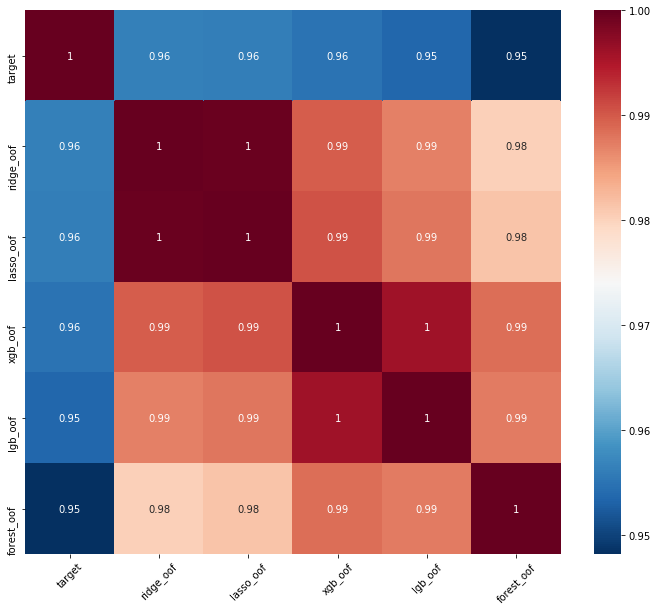

In [3]:
exp.plot_correlations(df[[col for col in df.columns if '_oof' in col]+['target']], 
                      target='target', annot=True)

target        1.000000
ridge_oof     0.956344
lasso_oof     0.956183
xgb_oof       0.955038
lgb_oof       0.953518
forest_oof    0.948226
forest_res    0.558354
xgb_res       0.341029
lgb_res       0.328224
lasso_res     0.305659
ridge_res     0.291753
Name: target, dtype: float64

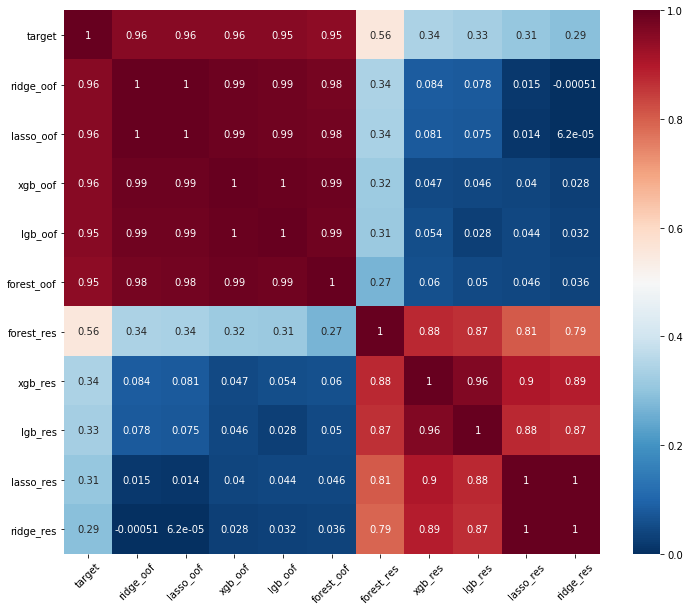

In [4]:
oof_cols = [col for col in df.columns if '_oof' in col]

for col in oof_cols:
    name = col.replace('_oof', '_res')
    df[name] = df['target'] - df[col]
    
exp.plot_correlations(df[[col for col in df.columns if '_oof' in col]+
                     [col for col in df.columns if '_res' in col]+
                     ['target']], target='target', annot=True)

This is even more evident if we look at the following plots.

            lasso_oof  ridge_oof  forest_oof   xgb_oof   lgb_oof  lasso_res  \
lasso_oof    1.000000   0.999656    0.981546  0.990628  0.987967   0.013508   
ridge_oof    0.999656   1.000000    0.980228  0.989843  0.987220   0.015176   
forest_oof   0.981546   0.980228    1.000000  0.988508  0.987547   0.046349   
xgb_oof      0.990628   0.989843    0.988508  1.000000  0.996082   0.040077   
lgb_oof      0.987967   0.987220    0.987547  0.996082  1.000000   0.043540   
lasso_res    0.013508   0.015176    0.046349  0.040077  0.043540   1.000000   
ridge_res    0.000062  -0.000514    0.036422  0.028258  0.031644   0.996234   
forest_res   0.338323   0.342254    0.265968  0.316660  0.314558   0.806682   
xgb_res      0.080560   0.083588    0.060472  0.046984  0.054286   0.902735   
lgb_res      0.074887   0.077761    0.049808  0.045648  0.028326   0.877453   
target       0.956183   0.956344    0.948226  0.955038  0.953518   0.305659   

            ridge_res  forest_res   xgb_res   lgb_r

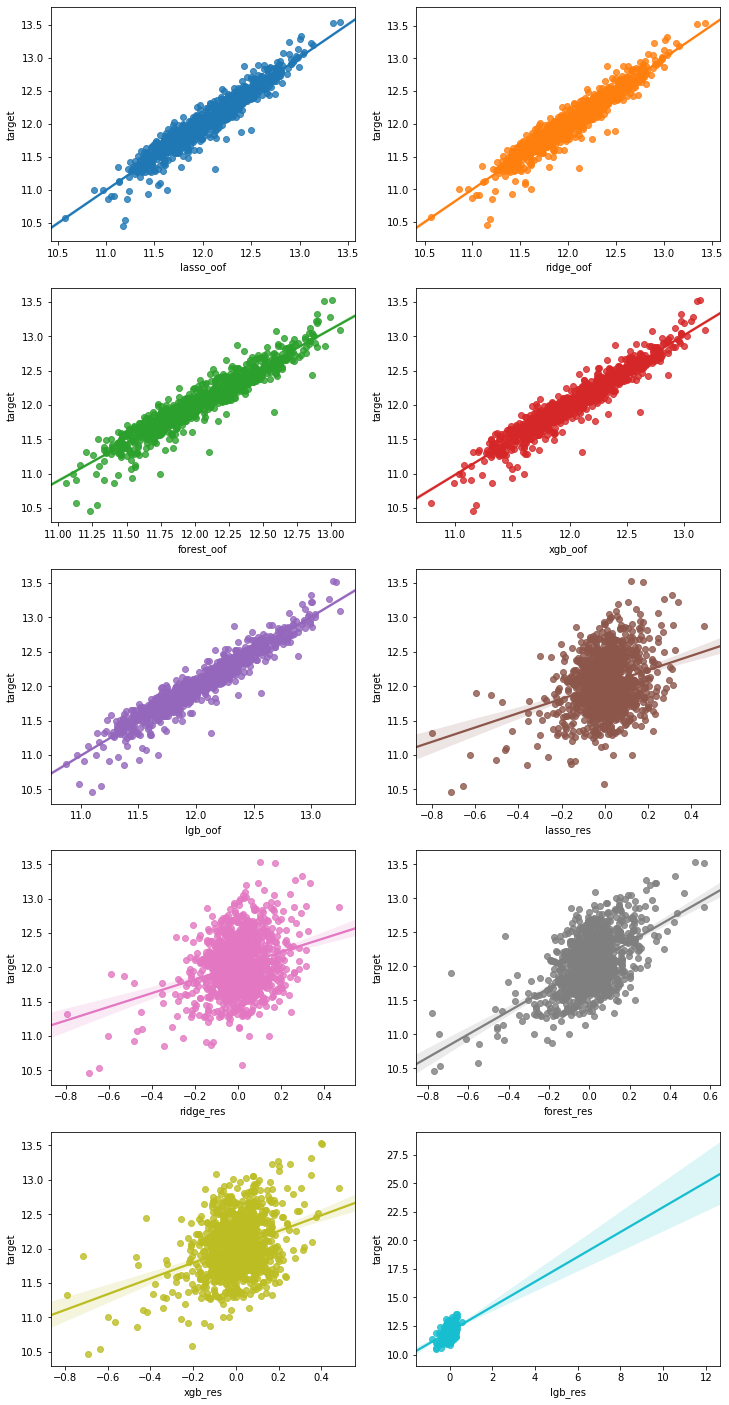

In [5]:
exp.corr_target(df, 'target', 
            [col for col in df.columns if '_oof' in col]+
                [col for col in df.columns if '_res' in col])

Looking at the residual plots, it appears evident that all the models we trained so far are underestimating the price of low costs houses and overestimating the more expensive ones. This could be because we used some target encoding or simply that we are overestimating, for example, the importance of the house size.

We can try to see if there are interesting relations between the residuals and the original features.

lgb_res          1.000000
xgb_res          0.961095
lasso_res        0.877453
ridge_res        0.868612
forest_res       0.866137
target           0.328224
BsmtFinSF1       0.101789
YrSold          -0.080825
OverallCond      0.078190
ridge_oof        0.077761
lasso_oof        0.074887
Id              -0.066992
LowQualFinSF    -0.063670
TotalBsmtSF      0.061860
GrLivArea        0.060909
LotArea          0.060836
ScreenPorch      0.056258
WoodDeckSF       0.051236
OverallQual      0.049937
forest_oof       0.049808
1stFlrSF         0.048702
YearBuilt        0.046342
PoolArea         0.045950
xgb_oof          0.045648
Fireplaces       0.041696
GarageCars       0.041020
MasVnrArea       0.040138
YearRemodAdd     0.039895
KitchenAbvGr    -0.037007
2ndFlrSF         0.036598
TotRmsAbvGrd     0.034882
BsmtUnfSF       -0.032913
HalfBath         0.031422
BsmtFullBath     0.029851
lgb_oof          0.028326
LotFrontage      0.026311
BsmtFinSF2      -0.022539
OpenPorchSF      0.018433
MSSubClass  

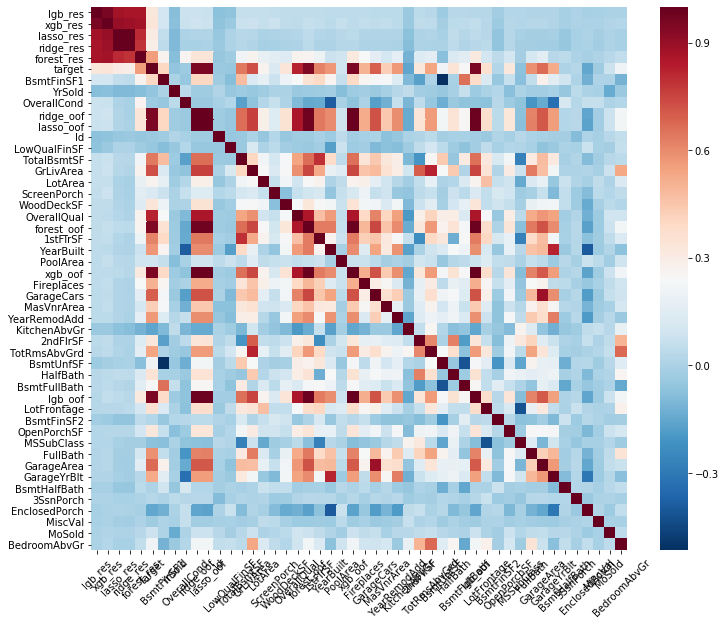

In [6]:
exp.plot_correlations(df, target='lgb_res')

Or, for the categorical features, we can start focusing on the feature that was used both to stratify our folds (and test set) and then to be target encoded: Neighborhood.

,count,mean,max,min,median,std
Neighborhood,,,,,,
Blmngtn,14,-0.003922,0.252137,-0.258945,0.014886,0.136129
Blueste,2,-0.006767,0.002347,-0.015882,-0.006767,0.012890
BrDale,13,-0.006592,0.122973,-0.135943,-0.004283,0.073850
BrkSide,46,0.032997,0.350734,-0.513648,0.060713,0.159725
ClearCr,22,0.025404,0.294185,-0.497918,0.036335,0.175145
CollgCr,120,0.000136,0.266519,-0.174036,0.002758,0.070394
Crawfor,41,0.031829,0.306575,-0.204903,0.036425,0.115808
Edwards,78,-0.001023,0.363077,-0.665046,0.011585,0.151910
Gilbert,63,0.002586,0.192698,-0.167342,0.007406,0.074437


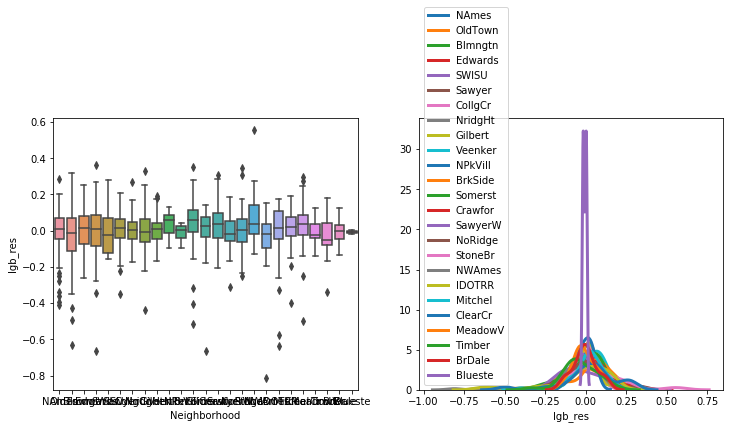

In [7]:
exp.segm_target(df, 'Neighborhood', 'lgb_res')

,Neighborhood,count_res,mean_res,max_res,min_res,median_res,std_res,mean_target,max_target,min_target,median_target,std_target
0,Blmngtn,14,-0.003922,0.252137,-0.258945,0.014886,0.136129,12.179361,12.485831,11.982279,12.133146,0.159205
1,Blueste,2,-0.006767,0.002347,-0.015882,-0.006767,0.012890,11.826543,11.925042,11.728045,11.826543,0.139298
2,BrDale,13,-0.006592,0.122973,-0.135943,-0.004283,0.073850,11.560918,11.736077,11.355113,11.571204,0.132869
3,BrkSide,46,0.032997,0.350734,-0.513648,0.060713,0.159725,11.676040,12.317171,10.579005,11.706027,0.372509
4,ClearCr,22,0.025404,0.294185,-0.497918,0.036335,0.175145,12.275824,12.700772,11.775297,12.291739,0.234329
5,CollgCr,120,0.000136,0.266519,-0.174036,0.002758,0.070394,12.172197,12.858322,11.608245,12.214770,0.248028
6,Crawfor,41,0.031829,0.306575,-0.204903,0.036425,0.115808,12.229254,12.850557,11.411457,12.289959,0.317566
7,Edwards,78,-0.001023,0.363077,-0.665046,0.011585,0.151910,11.684095,12.524421,10.976799,11.686887,0.289471
8,Gilbert,63,0.002586,0.192698,-0.167342,0.007406,0.074437,12.161274,12.841328,11.856522,12.106258,0.170260
9,IDOTRR,30,-0.028043,0.173069,-0.634704,0.015301,0.198667,11.505145,12.040614,10.460271,11.582903,0.352477


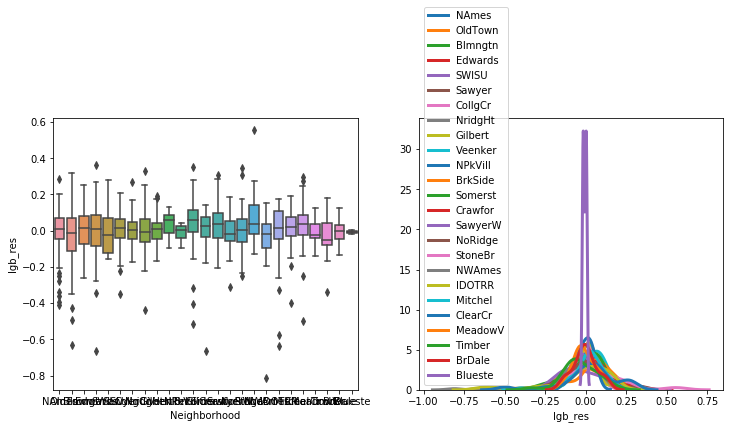

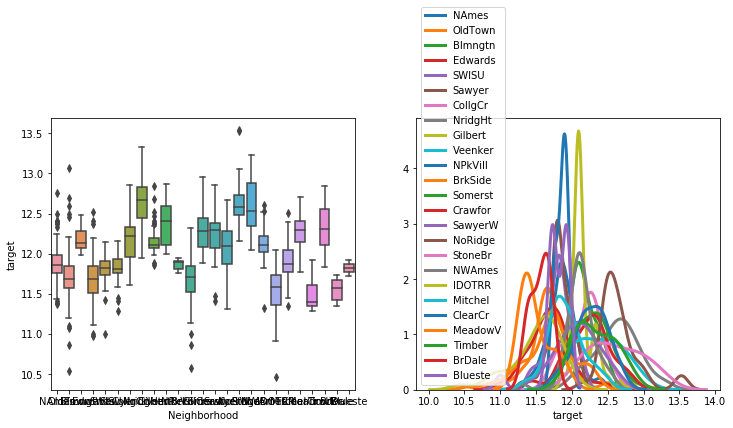

In [8]:
err = exp.segm_target(df, 'Neighborhood', 'lgb_res')
tar = exp.segm_target(df, 'Neighborhood', 'target')

tot = pd.merge(err.reset_index(), tar.reset_index(), on='Neighborhood', suffixes=('_res', '_target'))

del tot['count_target']

tot

In [9]:
tot.corr()

,count_res,mean_res,max_res,min_res,median_res,std_res,mean_target,max_target,min_target,median_target,std_target
count_res,1.000000,-0.099613,0.279925,-0.398280,-0.027375,0.091115,-0.024756,0.352306,-0.206834,-0.020592,0.134504
mean_res,-0.099613,1.000000,0.551004,0.308088,0.787381,0.129338,0.397764,0.312084,0.314284,0.394835,0.344693
max_res,0.279925,0.551004,1.000000,-0.188984,0.311361,0.672267,0.367017,0.599719,-0.042543,0.350140,0.655612
min_res,-0.398280,0.308088,-0.188984,1.000000,-0.020624,-0.648027,0.113932,-0.195069,0.465934,0.101414,-0.348504
median_res,-0.027375,0.787381,0.311361,-0.020624,1.000000,0.250281,0.159936,0.143252,0.055362,0.190360,0.301446
std_res,0.091115,0.129338,0.672267,-0.648027,0.250281,1.000000,0.034337,0.284995,-0.414498,0.042812,0.645380
mean_target,-0.024756,0.397764,0.367017,0.113932,0.159936,0.034337,1.000000,0.823236,0.792766,0.991543,0.222194
max_target,0.352306,0.312084,0.599719,-0.195069,0.143252,0.284995,0.823236,1.000000,0.430760,0.804493,0.531317
min_target,-0.206834,0.314284,-0.042543,0.465934,0.055362,-0.414498,0.792766,0.430760,1.000000,0.760294,-0.316768
median_target,-0.020592,0.394835,0.350140,0.101414,0.190360,0.042812,0.991543,0.804493,0.760294,1.000000,0.246387


A few unsurprising things are:

* the more houses from a neighborhood, the smaller the error on average. Which is also the pattern with the price, so we have to be mindful of that (neighborhood with more examples tend to have lower costs on average).
* We can confirm that neighborhood for which we have houses with higher average cost also get an higher error (not in absolute sense).

This makes me consider if it would be a good idea to not use the target encoding variables and see if that pattern in the error disappears.

Another possible test is to see if some variables we did not include, for example

/home/lucabasa/Git/kaggle_competitions/houseprice/hp/lib/python3.6/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/lucabasa/Git/kaggle_competitions/houseprice/hp/lib/python3.6/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,count,mean,max,min,median,std
Exterior1st,,,,,,
AsbShng,12,-0.075462,0.173069,-0.348886,-0.068122,0.133507
AsphShn,1,-0.065126,-0.065126,-0.065126,-0.065126,NaN
BrkComm,2,-0.277491,0.110063,-0.665046,-0.277491,0.548085
BrkFace,38,0.075536,0.350734,-0.175542,0.083733,0.117990
CBlock,1,-0.005930,-0.005930,-0.005930,-0.005930,NaN
CemntBd,44,0.005655,0.276128,-0.144137,-0.008693,0.081996
HdBoard,176,-0.011325,0.347416,-0.349864,-0.013812,0.094757
ImStucc,1,-0.057845,-0.057845,-0.057845,-0.057845,NaN
MetalSd,182,0.013019,0.553204,-0.321330,0.011872,0.112285


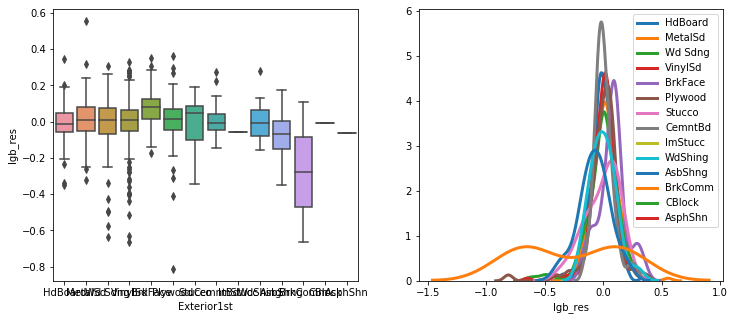

In [10]:
exp.segm_target(df, 'Exterior1st', 'lgb_res')

shows how the `MetalSd` exterior leads to a particularly different pattern in the distribution of the error. A direct inspection of these houses shows the following

In [11]:
df[df.Exterior1st == 'MetalSd'].describe() - df[df.Exterior1st != 'MetalSd'].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res
count,-802.000000,-802.000000,-641.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-794.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-763.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000,-802.000000
mean,33.059915,12.026936,-9.421806,-2182.179152,-0.635889,0.308329,-17.211918,-9.124777,-18.979013,-67.645604,-14.069072,-51.306319,-133.020995,-152.805101,-21.133309,10.388412,-163.549998,-0.044470,-0.031471,-0.223521,-0.071752,-0.111040,0.031191,-0.458546,-0.215324,-11.979011,-0.303449,-72.777886,-34.382516,-14.751597,18.526199,-4.046748,-0.988352,-3.020325,104.394220,0.150652,-0.013859,-0.198843,-0.196703,-0.185765,-0.191428,-0.194916,-0.179807,0.019036,0.016896,0.005958,0.011621,0.015109
std,-5.602309,10.174723,-5.901617,-5417.188018,-0.111310,-0.032657,-0.449653,1.996339,1.666882,-67.397963,-37.909031,-113.068597,-104.254079,-93.426591,-54.785960,33.079467,-79.585899,-0.008811,-0.076010,-0.021473,0.002602,0.019058,0.068611,-0.014639,-0.035610,0.919317,-0.018979,-7.821897,-25.002583,-10.243068,17.748803,-32.343336,-4.841798,-42.733430,849.649837,-0.067931,-0.060051,-0.075309,-0.075978,-0.074385,-0.075592,-0.072964,-0.088922,-0.013019,-0.012444,-0.030093,-0.014436,-0.009907
min,1.000000,0.000000,3.000000,-177.000000,2.000000,1.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.000000,0.000000,0.000000,186.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.550687,0.568205,0.102978,0.286985,0.196020,0.672872,0.488868,0.490385,0.354511,0.449521,0.489189
25%,63.500000,0.000000,-9.000000,-1665.250000,0.000000,0.000000,-18.750000,-15.750000,0.000000,0.000000,0.000000,58.000000,-79.000000,-75.500000,0.000000,0.000000,-72.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-14.000000,0.000000,-70.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.133432,-0.128519,-0.123729,-0.112577,-0.128612,-0.106986,0.010329,0.007516,0.019661,0.001687,0.002459
50%,63.500000,0.000000,-10.000000,-1197.500000,-1.000000,1.000000,-20.000000,-19.000000,0.000000,-26.000000,0.000000,34.500000,-110.500000,-126.000000,0.000000,0.000000,-185.500000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-19.000000,0.000000,-51.500000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.227381,-0.231984,-0.219792,-0.229090,-0.226500,-0.205064,0.011512,0.004757,0.006658,0.008452,0.004476
75%,11.000000,20.000000,-10.000000,-1419.500000,-1.000000,1.000000,-27.000000,-4.250000,-63.750000,-141.250000,0.000000,-78.750000,-248.500000,-237.500000,-79.750000,0.000000,-233.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-10.000000,0.000000,-54.500000,-49.250000,-21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.323064,-0.323255,-0.273456,-0.289335,-0.281206,-0.292436,0.017093,0.013418,-0.006197,0.005749,0.010967
max,-1.000000,0.000000,-175.000000,-129527.000000,-1.000000,0.00

In other words, houses with that particular exterior

* Are less likely to have land in front of them
* Are lower in quality, in particular they never hit the perfect score. This could be interpreted as a bias in the data collection
* Were built less recently, which makes perfect sense as building techniques change with time
* Have much smaller basements and garages
* Are much smaller in general
* Are less likely to have a fireplace
* Cost less in general

We could then consider to include this feature as well and see how the model reacts.

Another approach would be to explore the entries with the biggest errors. For example

In [27]:
def high_low_errors(data, *, res_list=None, n_samples=50,
                    target=None, pred_list=None, mean=False, 
                    abs_err=True, common=False):
    
    df = data.copy()
    if pred_list:
        res_list = []
        for col in pred_list:
            name = col + '_res'
            res_list.append(name)
            df[name] = df[target] - df[col]
    
    errors = {}
    
    if mean:
        df['mean_res'] = df[res_list].mean(axis=1)
        res_list += ['mean_res']

    for col in res_list:
        if abs_err:
            if col == 'abs_err':
                name = 'abs_err'
            else:
                name = 'abs_' + col
            df[name] = abs(df[col])
        else:
            name = col
        
        high_err = df.sort_values(name, ascending=False).head(n_samples)
        low_err = df.sort_values(name, ascending=False).tail(n_samples)
        
        try:
            errors[name] = high_err.describe(include='all').drop(index=['top', 'count', 'freq']).fillna(0) - \
                        low_err.describe(include='all').drop(index=['top', 'count', 'freq']).fillna(0)
        except KeyError:
            errors[name] = high_err.describe().fillna(0) - low_err.describe().fillna(0)
        
    return errors

In [14]:
h_v_l = high_low_errors(df, res_list=[col for col in df.columns if '_res' in col], mean=True)

h_v_l.keys()

dict_keys(['abs_lasso_res', 'abs_ridge_res', 'abs_forest_res', 'abs_xgb_res', 'abs_lgb_res', 'abs_mean_res'])

In [15]:
h_v_l['abs_mean_res']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res,mean_res,abs_lasso_res,abs_ridge_res,abs_forest_res,abs_xgb_res,abs_lgb_res,abs_mean_res
unique,0.000000,0.000000,0,0.000000,0.000000,0,1,0,2,1,-2,0,4,2,1,-1,2,0.000000,0.000000,0.000000,0.000000,1,2,4,3,0,0.000000,2,0,1,1,0,0,0,0.000000,0,0.000000,0.00000,0.000000,2,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,3,0.000000,1,1,0.00000,0,0.000000,0.000000,3,2,2,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2,0,1,0.000000,0.000000,0.000000,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,39.200000,3.100000,0,3.195122,-227.720000,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.020000,-23.580000,-4.120000,0,0,0,0,0,-25.660000,0,0,0,0,0,0,0,-171.720000,0,0.920000,194.92000,24.120000,0,0,0,0,61.520000,89.680000,14.560000,165.760000,-0.200000,0.080000,0.060000,-0.120000,-0.100000,0.040000,0,0.100000,0,0.100000,0,0,-11.98381,0,-0.080000,-20.900000,0,0,0,-42.480000,10.200000,17.68000,-0.720000,1.740000,25.860000,0,0,0,85.080000,-0.160000,0.220000,0,0,-0.059205,-0.062855,-0.047962,-0.056462,-0.039925,-0.183869,-0.124664,-0.121014,-0.135907,-0.127407,-0.143944,-0.130587,0.310866,0.302999,0.362240,0.346402,0.342322,0.359034
std,-33.492125,-0.483813,0,3.586297,-12488.020297,0,0,0,0,0,0,0,0,0,0,0,0,0.595013,0.486065,12.205969,3.039261,0,0,0,0,0,-29.163211,0,0,0,0,0,0,0,123.667468,0,46.548428,105.99817,172.069122,0,0,0,0,148.207154,81.857445,83.411975,351.623564,0.077122,0.161624,0.135419,-0.053454,0.120616,0.063148,0,0.394229,0,0.193082,0,0,8.32425,0,0.374112,138.808533,0,0,0,-36.049293,40.007603,24.02974,-5.091169,15.746712,129.302053,0,0,0,411.348546,0.332459,0.048668,0,0,0.218902,0.220698,0.158581,0.195565,0.199391,0.456903,0.311343,0.302050,0.362396,0.347385,0.336603,0.363625,0.123158,0.118095,0.118353,0.118676,0.114353,0.133610
min,3.000000,0.000000,0,24.000000,2653.000000,0,0,0,0,0,0,0,0,0,0,0,0,-1.000000,-2.000000,-34.000000,0.000000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,0.000000,0,0.000000,0.00000,0.000000,0,0,0,0,-200.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000000,0,0.000000,0,0,-50.00000,0,-1.000000,-261.000000,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000,0,0,-0.180387,-0.183935,-0.149467,-0.150197,-0.163444,-0.829524,-0.688213,-0.663396,-0.686549,-0.739948,-0.727375,-0.792686,0.118467,0.097642,0.198730,0.167481,0.208687,0.232136
25%,128.500000,0.000000,0,-2.000000,40.250000,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,-32.500000,-11.500000,0,0,0,0,0,0.000000,0,0,0,0,0,0,0,-114.000000,0,0.000000,109.00000,-113.750000,0,0,0,0,-67.750000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0,-1.000000,0,0.000000,0,0,-12.00000,0,0.000000,-58.500000,0,0,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0,0,0,0.000000,-1.000000,0.000000,0,0,-0.238047,-0.245938,-0.163598,-0.193520,-0.195451,-0.504406,-0.328476

* Alley is a low cardinality feature, that difference might be interesting
* High errors have bigger LotFrontage but much smaller LotArea
* Low errors are built more recently
* High errors have a bigger basement but also more unfinished
* High errors are much bigger in general
* It appears we are not capturing the MiscVal
* The high are negative on average, meaning that they overestimate the price
* Low errors are coming from more expensive houses.

# Using the actual model data

In [24]:
df = pd.read_csv('../oof_pred/for_error_analysis_lgb_transf.csv')

df.head()

,MSSubClass,Alley,LotShape,LandContour,Neighborhood,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,MSZoning_RM,LotConfig_CulDSac,LotConfig_Inside,BldgType_Duplex,BldgType_TwnhsE,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res,MisGarage,total_bath,service_area
0,-0.734862,0.0,0.0,0.0,-0.628694,0.0,0.0,-4.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.085123,-1.0,0.0,-0.239130,-0.815789,0.000000,-0.821152,0.257276,0.000000,-0.409922,-1.0,0.0,-1.0,-0.380952,0.0,0.000000,-0.352941,0.0,0.0,0.0,-0.846959,-0.834080,-0.712696,-0.786719,-0.866286,-0.940166,-0.260280,-0.400350,-1.108850,-0.627959,-0.418021,0.0,0.0,-1.381740
1,0.000000,0.0,0.0,0.0,-0.628694,0.0,0.0,-1.0,0.0,0.0,-0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.055674,-0.5,1.0,-0.500000,0.078947,0.000000,-0.821152,-0.015901,0.000000,-0.689524,-1.0,-0.5,-1.0,-0.666667,-1.0,2.178571,-0.352941,112.0,0.0,0.0,-0.292118,-0.311648,-0.391969,-0.271307,-0.293177,-0.279716,0.101001,0.116968,0.441316,-0.015639,0.002499,0.0,0.0,-0.150971
2,-0.723016,0.0,0.0,0.0,-1.083858,0.0,0.0,-1.0,0.0,0.0,-0.5,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.475050,-0.5,-1.0,-1.586957,-1.131579,0.000000,0.107481,-0.430421,0.753247,-0.052127,0.0,0.0,-1.0,-0.904762,-1.0,0.000000,-0.352941,77.0,0.0,0.0,-1.030833,-1.096586,-0.852728,-1.102196,-1.173515,-1.442014,-1.583020,-1.373796,-2.698309,-1.412811,-1.246100,0.0,-1.0,-0.763480
3,-0.736713,0.0,0.0,0.0,-1.083858,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.635009,0.0,1.0,-1.369565,0.131579,0.000000,-0.532244,0.319624,1.409433,0.970358,1.0,1.5,0.0,-1.857143,0.0,0.000000,-0.352941,0.0,0.0,99.0,0.148986,0.135310,0.048740,0.055052,0.096150,-0.397703,-2.345589,-2.307303,-1.812567,-1.880810,-2.022368,0.0,0.5,0.427031
4,-0.723016,0.0,0.0,0.0,-0.628694,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.412346,-0.5,0.0,-0.326087,-0.921053,1.099237,-0.109200,-0.467010,0.888585,0.072701,0.0,0.5,-1.0,-0.476190,-1.0,0.000000,-0.352941,0.0,0.0,0.0,-0.468049,-0.532445,-0.339516,-0.375455,-0.335419,-0.253776,0.987028,1.178798,0.343983,0.530366,0.275769,0.0,-0.5,-0.336449


lasso_oof             1.000000
ridge_oof             0.999656
xgb_oof               0.990628
lgb_oof               0.987967
forest_oof            0.981546
target                0.956183
OverallQual           0.862120
Neighborhood          0.782377
service_area          0.777249
GrLivArea             0.773590
GarageCars            0.727304
KitchenQual           0.719972
ExterQual             0.718442
total_bath            0.707221
1stFlrSF              0.638020
BsmtQual              0.632089
MSSubClass            0.603672
YearBuilt             0.597983
YearRemodAdd          0.594701
GarageYrBlt           0.589337
TotRmsAbvGrd          0.566641
Fireplaces            0.524597
HeatingQC             0.503442
MasVnrArea            0.441425
LotArea               0.423711
GarageFinish_Unf     -0.421206
GarageType_Detchd    -0.414262
MasVnrType_None      -0.413731
CentralAir_Y          0.365674
MisGarage            -0.353311
WoodDeckSF            0.350146
2ndFlrSF              0.343343
forest_r

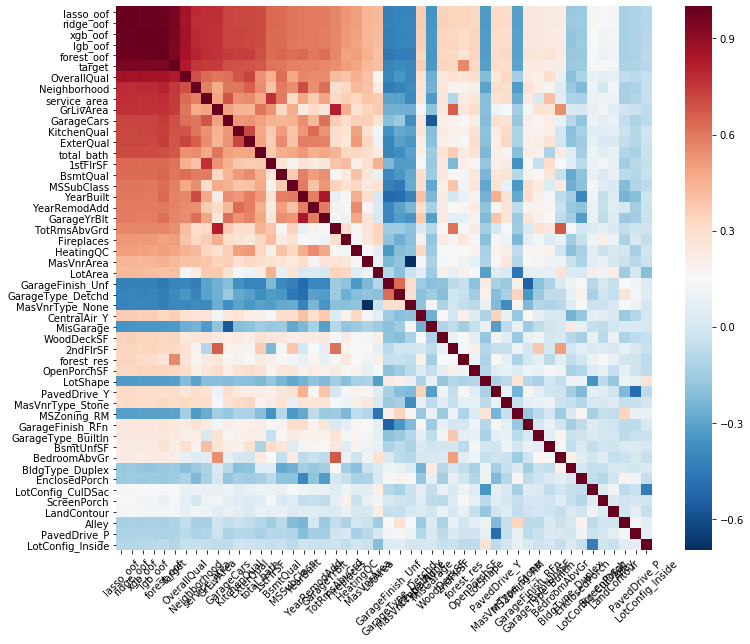

In [29]:
exp.plot_correlations(df, target='lasso_oof')

In [28]:
h_v_l = high_low_errors(df, res_list=[col for col in df.columns if '_res' in col], mean=True)

h_v_l['abs_mean_res']

,MSSubClass,Alley,LotShape,LandContour,Neighborhood,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,HeatingQC,KitchenQual,MSZoning_RM,LotConfig_CulDSac,LotConfig_Inside,BldgType_Duplex,BldgType_TwnhsE,MasVnrType_None,MasVnrType_Stone,CentralAir_Y,GarageType_BuiltIn,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,lasso_oof,ridge_oof,forest_oof,xgb_oof,lgb_oof,target,lasso_res,ridge_res,forest_res,xgb_res,lgb_res,MisGarage,total_bath,service_area,mean_res,abs_lasso_res,abs_ridge_res,abs_forest_res,abs_xgb_res,abs_lgb_res,abs_mean_res
count,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,-0.314101,0.080000,0.020000,0.040000,-0.362758,-0.080000,0.0,-0.120000,0.0,0.0,-0.200000,-0.0600,0.180000,0.000000e+00,-0.040000,0.020000,-0.020000,0.100000,-0.060000,-0.180000,-0.020000,0.120000,-0.300000,0.100000,0.020000,-0.140000,0.171310,-0.050000,0.120000,-0.520000,-0.175263,0.178443,0.317420,0.030609,0.227751,0.222490,0.100000,0.310000,0.140000,-0.462381,-0.260000,-0.068810,0.196176,19.760000,-7.280000,4.64000,-0.097600,-0.098131,-0.111361,-0.113508,-0.074468,-0.385732,-1.209513,-1.195504,-1.206892,-1.144447,-1.277563,0.180000,-0.070000,-0.007477,-1.206784,2.640827,2.574222,3.120524,2.910062,2.831159,2.992675
std,0.117635,0.130312,-0.004557,0.063148,0.187926,0.186403,0.0,-0.110739,0.0,0.0,0.061981,0.2698,0.150512,2.775558e-17,0.027358,0.028998,-0.056527,-0.031962,-0.088363,0.388088,-0.056527,0.053454,-0.133129,0.002031,0.141421,0.190139,-0.163468,0.322513,0.630768,0.144714,0.101306,0.668979,0.160642,0.329815,0.188408,0.395612,0.369966,0.423424,0.094892,0.222882,0.318285,-0.021412,0.633810,31.338553,-51.477374,22.65573,0.464106,0.474828,0.334671,0.413522,0.407080,0.910127,2.635625,2.552631,3.076081,2.902701,2.727625,0.388088,0.280785,0.389586,2.986491,1.117167,1.066273,1.055967,1.050833,0.968404,1.125659
min,0.000000,0.000000,0.000000,0.000000,-0.251707,-1.000000,0.0,0.000000,0.0,0.0,-0.500000,-1.0000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.368244,-1.500000,-2.000000,0.152174,0.000000,0.000000,0.000000,-1.155412,0.000000,-1.395023,0.000000,-0.500000,0.000000,-0.547619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1.293446,-1.322983,-0.539416,-0.996925,-0.561250,-1.641802,-5.790794,-5.511054,-5.837348,-6.255848,-6.024002,0.000000,0.000000,-0.422717,-6.632260,0.055856,0.083747,1.732695,1.337180,1.616561,1.955684
25%,-0.723016,0.000000,0.000000,0.000000,-0.460888,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.239329,0.000000,0.000000,-0.690217,-0.375000,0.000000,0.290628,-0.062874,0.000000,0.139502,-1.000000,0.000000,0.000000,-0.607143,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-0.380125,-0.405479,-0.373858,-0.352470,-0.354505,-0.964595,-2.924112,-2.938408,-3.413534,-3.136113,-3.150903,0.000000,-1.000000,-0.314162,-3.122179,1.977139,2.042080,2.215362,2.236308,2.161649,2.258020
50%,-0.048925,0.000000,0.000000,0.000000,-0.690518,0.000000,0.0,-1.000000,0.0,0.0,-0.500000,-0.5000,0.000000,0.000000e+00,0.000000,0.000000,0.0

We indeed see how `MSSubClass` and `Neighborhood` are very different for high and low errors. This is a consequence of the lower prices of the houses with low error. The suspect that the model is following too much these 2 features is getting bigger.